# ***Predictive Quality in Additive Manufacturing***

Week 1: Data exploration
 Which structure has the production system? Are all features present for all products?
 Which product clusters can be identified based on the existence of features? Do features
 correlate? Are there outliers in the features?

## Data import and visualization

All necessary packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install openpyxl
import matplotlib.patches as mpatches

In [2]:
# change data_path according to the path of data
current_path = os.getcwd()
print("current pth:", current_path)
#data_path = os.path.dirname(current_path)
if os.path.exists("02_Data"):
    data_path = ("02_Data")
    print("Data has been founded at:", data_path)
else:
    print("Can`t find Data")
Audio_path = os.path.join(data_path,"01_Audio")
#print("Audio:", Audio_path)
Audio_files = [ f for f in os.listdir(Audio_path) if f.endswith(".csv")]
print("Audio_files are: ", Audio_files)
list_Audio = []
id_Audio = []
for file_name in Audio_files:
    file_path = os.path.join(Audio_path,file_name)
    #get data
    df = pd.read_csv(file_path)
    list_Audio.append(df)
    #get data id
    id_Audio.append(int(os.path.splitext(os.path.basename(file_path))[0]))
print("Audio_len: ",len(list_Audio))
print("shape of list_Audio:", list_Audio[0].shape) 


Weldqas_path = os.path.join(data_path,"02_Weldqas")
Weldqas_files = [ j for j in os.listdir(Weldqas_path) if j.endswith(".csv")]
print("Weldqas_files are: ", Weldqas_files)
list_Weldqas = []
for file_name in Weldqas_files:
    file_path = os.path.join(Weldqas_path,file_name)
    df = pd.read_csv(file_path)
    list_Weldqas.append(df)
print("Weldqas_len: ",len(list_Weldqas))
print("shape of list_Weldqas:", list_Weldqas[0].shape) 
##get the path o excel
excel_paths = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".xlsx"):
            excel_paths.append(os.path.join(data_path,file))
print(excel_paths)

current pth: c:\Users\13370\Desktop\SS25\KI_in_der_Produktionstechnik\Project\PQAM
Data has been founded at: 02_Data
Audio_files are:  ['169.csv', '170.csv', '171.csv', '172.csv', '173.csv', '174.csv', '175.csv', '176.csv', '177.csv', '178.csv', '179.csv', '180.csv', '181.csv', '182.csv', '183.csv', '184.csv', '185.csv', '186.csv', '187.csv', '188.csv', '189.csv', '190.csv', '191.csv', '192.csv', '193.csv', '194.csv', '195.csv', '196.csv', '197.csv', '198.csv', '199.csv', '200.csv', '201.csv', '202.csv', '203.csv', '204.csv', '205.csv', '206.csv', '207.csv', '208.csv', '209.csv', '210.csv', '211.csv', '212.csv', '213.csv', '214.csv', '215.csv', '216.csv', '217.csv', '218.csv', '219.csv', '220.csv', '221.csv', '222.csv', '223.csv', '224.csv', '225.csv', '226.csv', '227.csv', '228.csv', '229.csv', '230.csv', '231.csv', '232.csv', '233.csv', '234.csv', '235.csv', '236.csv', '237.csv', '238.csv', '239.csv', '240.csv', '241.csv', '242.csv', '243.csv', '244.csv', '245.csv', '246.csv', '247.c

# Read Excel

In [ ]:
#get the header of table
excel_df = pd.read_excel(excel_paths[0], sheet_name=0,skiprows=10)
print(excel_df.columns)
df_Usage = excel_df[["Number of Measurement",'Dataset']]
Audio_df_without_label = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "DAta of Audio": list_Audio
})

label_map = dict(zip(df_Usage["Number of Measurement"], df_Usage["Dataset"]))

# conbine csv data with excel
audio_list_with_labels = []

for id_, audio in zip(id_Audio, list_Audio):
    label = label_map.get(id_, None)  
    audio_list_with_labels.append({
        "id": id_,
        "audio": audio,
        "label": label
    })


Index(['Unnamed: 0', 'Number of Measurement', 'Experiment', 'Process',
       'Usable', 'Dataset', 'Audio', 'Currency I [A]', 'Time [ms]',
       'Eintauchmaß p [mm]', 'Hub h [mm]', 'Forced Error Type',
       'Coaxial Offset [mm]', 'Tilt [°]', 'Notes'],
      dtype='object')


In [13]:
print(audio_list_with_labels[0])

{'id': 169, 'audio':          Unnamed: 0       Time    M
0                 0   0.000000   28
1                 1   0.000021   26
2                 2   0.000042   23
3                 3   0.000063   27
4                 4   0.000083   22
...             ...        ...  ...
1021947     1021947  21.290563  216
1021948     1021948  21.290583  227
1021949     1021949  21.290604  242
1021950     1021950  21.290625  249
1021951     1021951  21.290646  263

[1021952 rows x 3 columns], 'label': 'iO'}


# Audio part

### read function to read a single file and print it out

In [ ]:
# read single file
#file_path = os.path.join(Audio_path,"169.csv")
#df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
def ReadSingleAudio(id_Audio):
    for sample in audio_list_with_labels:
        
        if sample['id'] == id_Audio:
                 
            df = pd.DataFrame({
                "Measurement": sample['audio']['M'],
                "Time":sample['audio']['Time'],
                
                })
            
            print(df)
            #df.info()
            x = df["Time"]
            y = df["Measurement"]
            plt.figure(figsize=(30, 4)) 
            plt.plot(x,y)

            plt.xlabel("Time (s)")
            plt.ylabel("Measurement ")
            plt.title(f" Audio ID : {id_Audio} | Label :{sample['label']}")
            plt.show()




        Measurement      Time
0              -122  0.000000
1              -120  0.000021
2              -119  0.000042
3              -122  0.000063
4              -137  0.000083
...             ...       ...
232443          313  4.842562
232444          310  4.842583
232445          312  4.842604
232446          304  4.842625
232447          300  4.842646

[232448 rows x 2 columns]


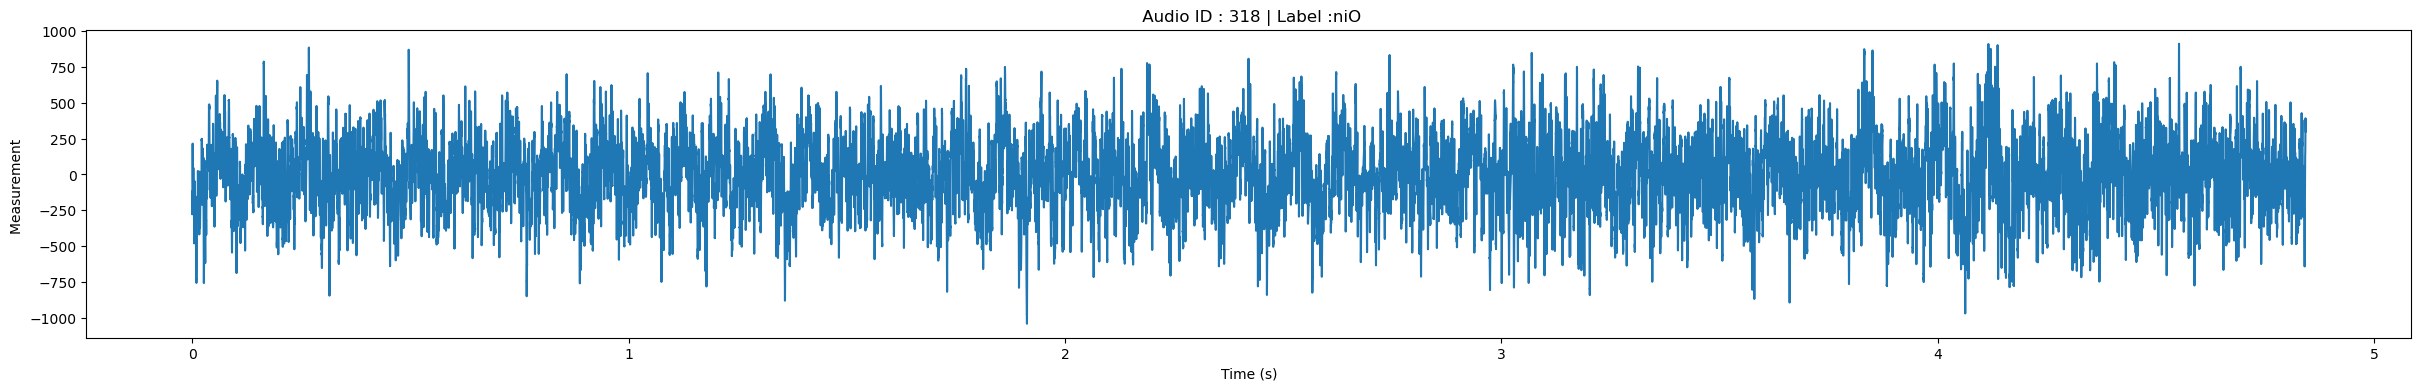

In [99]:
ReadSingleAudio(318)

In [ ]:
# create high-pass filter to dinimish background noise


### MFCC
MFCC (Mel-Frequency Cepstral Coefficients) is one of the most commonly used features in audio signal processing, especially in speech recognition, speaker identification, and emotion analysis. It mimics the human ear’s perception of sound frequencies and extracts key spectral characteristics from the audio.
The computation steps include:
1.  Framing and windowing
2.  Fast Fourier Transform (FFT)
3.  Applying Mel filter banks
4.  Taking logarithm of filter energies

In [6]:
!pip install librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt

Estimated sampling rate (sr): 48000 Hz


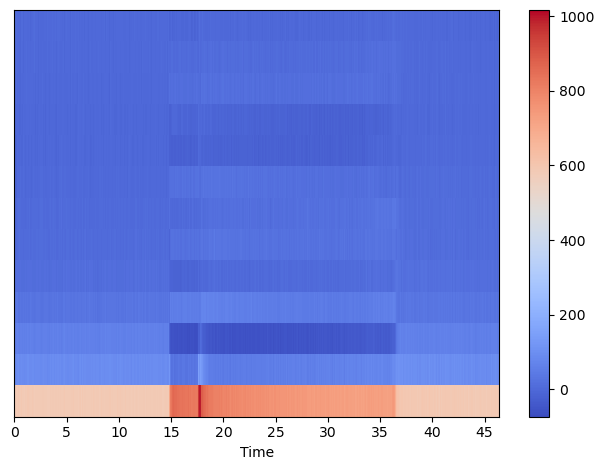

[[ 5.7365265e+02  5.8765656e+02  5.9133368e+02 ...  5.8647357e+02
   5.8716431e+02  5.8231982e+02]
 [ 7.8476257e+01  9.4175354e+01  9.8066170e+01 ...  8.9629501e+01
   9.0327286e+01  8.5128571e+01]
 [ 5.6366192e+01  6.3362091e+01  6.4833450e+01 ...  5.6667496e+01
   5.6610619e+01  5.3542042e+01]
 ...
 [ 1.9949936e+00 -3.6784949e+00 -6.9327059e+00 ...  2.8189116e+00
   2.7418289e+00 -1.8927000e+00]
 [-1.8971267e+00 -5.6749859e+00 -6.2844577e+00 ...  3.9611816e+00
   8.0100136e+00  1.6167904e-01]
 [-4.0007420e+00 -4.7315812e+00 -3.7990403e+00 ...  1.8818403e+00
   7.2184830e+00  1.8535123e+00]]
1997


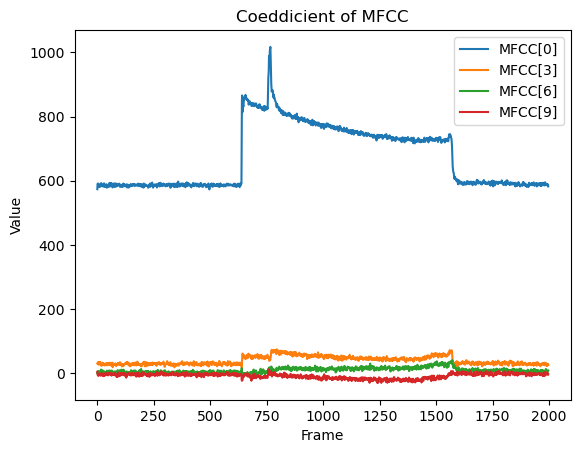

In [8]:
# to schieve MFCC
# Estimated sampling rate based on test data
delta_t = df["Time"].iloc[1] - df["Time"].iloc[0]
sr = round(1 / delta_t)
print(f"Estimated sampling rate (sr): {sr} Hz")
# Compute MFCC with 13 coefficients 
n_mfcc=13
# librosa only accept numpy type data
mfccs = librosa.feature.mfcc(y=df["M"].values.astype(np.float32), sr=sr, n_mfcc=n_mfcc)

librosa.display.specshow(mfccs, x_axis='time')
# Add a color bar on the right to indicate MFCC magnitude
plt.colorbar()
plt.tight_layout()
plt.show()
print(mfccs)
print(len(mfccs[0]))
for i in range(0, 12, 3):
    
    y = mfccs [i]
    plt.plot(y, label=f"MFCC[{i}]")
plt.xlabel("Frame")
plt.ylabel("Value")
plt.title("Coeddicient of MFCC")
plt.legend()
plt.show()

MFCC[0]：   Represents the log total energy of the signal.

MFCC[3]：   Describe the general shape of the spectral envelope (like tilt).

MFCC[6]：   Reflect mid-frequency variations.

MFCC[9]：   Capture high-frequency modulations.

In [11]:
#compute MFCCp[0] part duration which over threhold
def get_mfcc0_duration_over_threshold(mfccs, threshold, sr, hop_length=512):
     mfcc_0 = mfccs[0]
     above_threshold = mfcc_0 > threshold
     num_frames = above_threshold.sum()
     frame_duration = hop_length / sr

     return num_frames * frame_duration

duration = get_mfcc0_duration_over_threshold(mfccs, 700, sr=sr)
print(f"MFCC[0] > 700 duration time：{duration:.3f} s")

MFCC[0] > 700 duration time：9.941 s


### FFT

Estimated sampling rate (sr): 48000 Hz


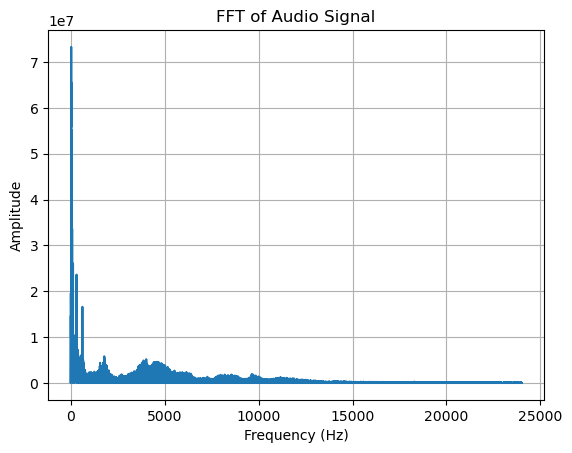

[0.00000000e+00 4.69689379e-02 9.39378758e-02 ... 2.39998591e+04
 2.39999061e+04 2.39999530e+04] 450211.44579391606 73283746.93857527


In [10]:
# FFT
# Perform the Fast Fourier Transform (FFT) on the audio signal in column "M"
Y = np.fft.fft(df["M"])
# Compute the frequency bins corresponding to the FFT result
# Estimated sampling rate based on test data
delta_t = df["Time"].iloc[1] - df["Time"].iloc[0]
sr = round(1 / delta_t)
print(f"Estimated sampling rate (sr): {sr} Hz")
frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
# Plot the magnitude spectrum (only the positive half of frequencies and amplitudes)
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y)[:len(Y)//2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Audio Signal")
plt.grid(True)
plt.show()

peak_freq = frequencies[:len(frequencies)//2]
mean_amp = np.mean(np.abs(Y[:len(Y)//2]))
max_amp = np.max(np.abs(Y[:len(Y)//2]))

print(peak_freq, mean_amp, max_amp)


        Unnamed: 0       Time    M
0                0   0.000000  226
1                1   0.000021  249
2                2   0.000042  267
3                3   0.000063  283
4                4   0.000083  302
...            ...        ...  ...
791547      791547  16.490562 -453
791548      791548  16.490583 -457
791549      791549  16.490604 -471
791550      791550  16.490625 -476
791551      791551  16.490646 -474

[791552 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791552 entries, 0 to 791551
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  791552 non-null  int64  
 1   Time        791552 non-null  float64
 2   M           791552 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 18.1 MB


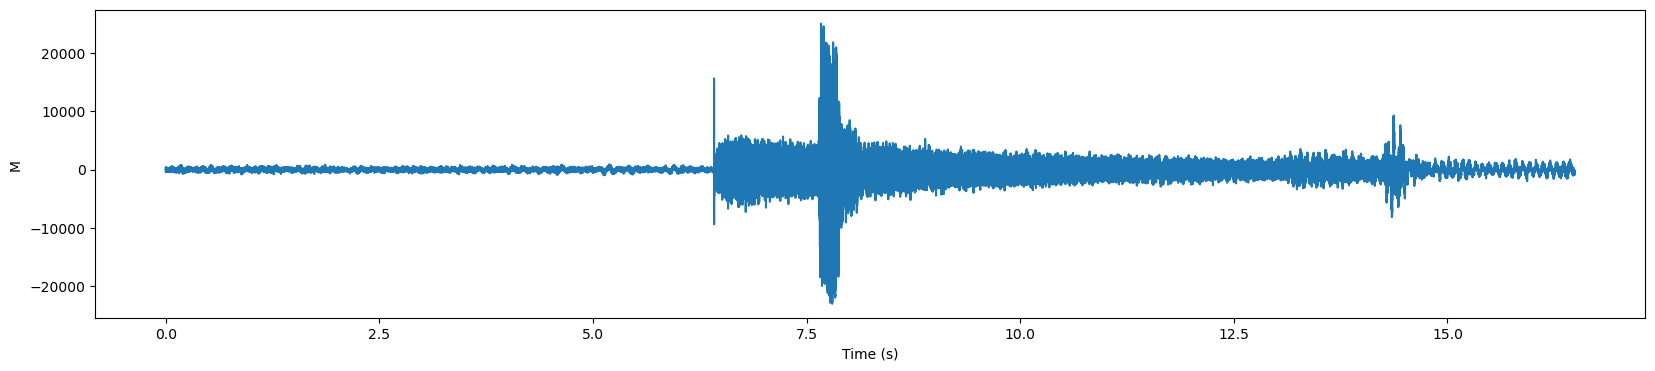

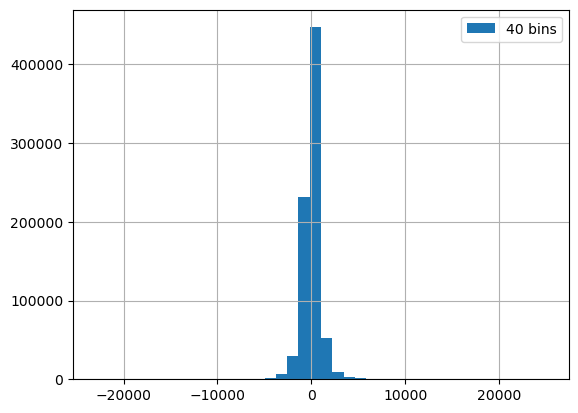

In [17]:
# read single failde file
file_path = os.path.join(Audio_path,"250.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
plt.figure(figsize=(20, 4))
print(df)
df.info()
x = df["Time"]
y = df["M"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("M ")
plt.show()
df["M"].hist(bins = 40, label= '40 bins')
plt.legend()
plt.show()

Estimated sampling rate (sr): 48000 Hz


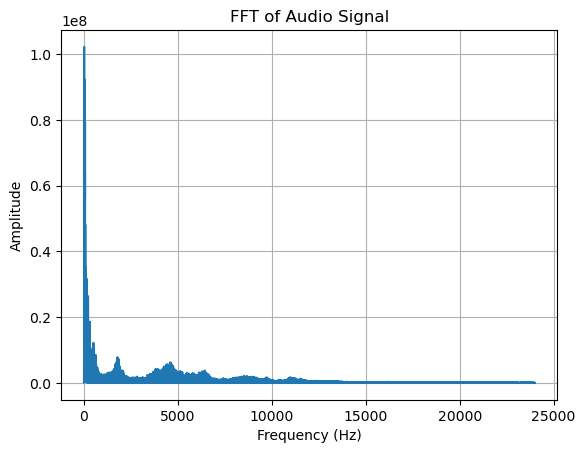

[0.00000000e+00 5.48245614e-02 1.09649123e-01 ... 2.39998355e+04
 2.39998904e+04 2.39999452e+04] 549879.5995592145 102260123.25638433


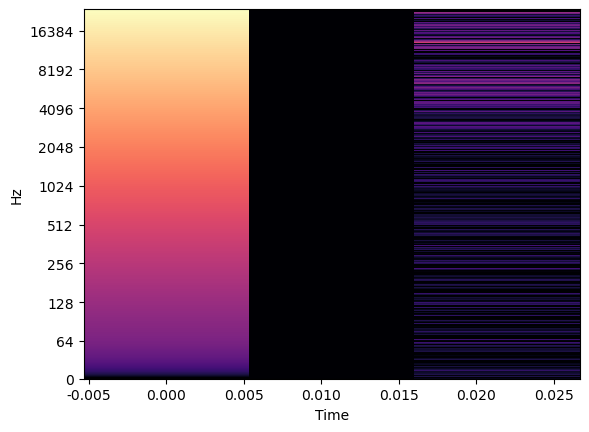

In [ ]:
# FFT
# Perform the Fast Fourier Transform (FFT) on the audio signal in column "M"
Y = np.fft.fft(df["M"])
# Compute the frequency bins corresponding to the FFT result
# Estimated sampling rate based on test data
delta_t = df["Time"].iloc[1] - df["Time"].iloc[0]
sr = round(1 / delta_t)
print(f"Estimated sampling rate (sr): {sr} Hz")
frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
# Plot the magnitude spectrum (only the positive half of frequencies and amplitudes)
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y)[:len(Y)//2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Audio Signal")
plt.grid(True)
plt.show()

peak_freq = frequencies[:len(frequencies)//2]
mean_amp = np.mean(np.abs(Y[:len(Y)//2]))
max_amp = np.max(np.abs(Y[:len(Y)//2]))

print(peak_freq, mean_amp, max_amp)

### Mean

   Number of Measurement  Mean of Audio Dataset
0                    169      -0.011418      iO
1                    170       0.014857      iO
2                    171       0.057396      iO
3                    172      -0.172601      iO
4                    173      -0.183890      iO


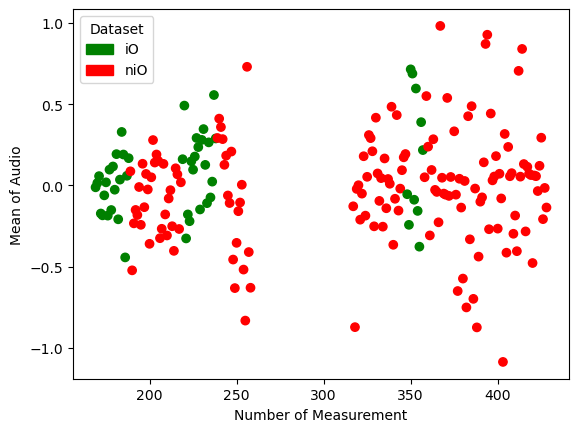

In [30]:
#get mean of Audio based on M
mean_list = [df["M"].values.mean() for df in list_Audio]
mean_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "Mean of Audio": mean_list
})
#merge mean with Dataset of excel
Audio_mean_df = mean_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_mean_df.head())

colors = Audio_mean_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_mean_df['Number of Measurement'],Audio_mean_df['Mean of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("Mean of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()



### Std

   Number of Measurement  Std of Audio Dataset
0                    169   1485.917267      iO
1                    170   1353.614509      iO
2                    171   1607.308788      iO
3                    172   1684.633736      iO
4                    173   1668.711885      iO


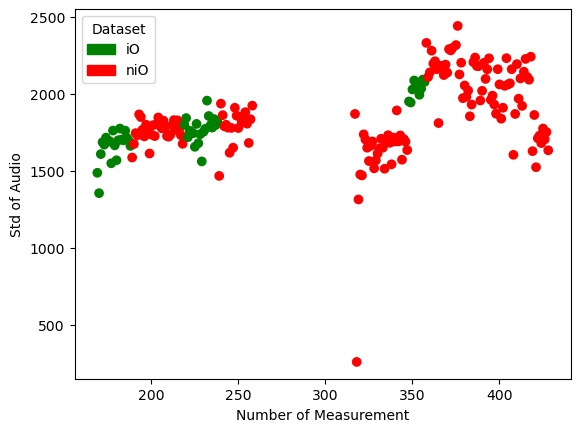

In [31]:
#get std of Audio based on M
std_list = [df["M"].values.std() for df in list_Audio]
std_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "Std of Audio": std_list
})
#merge std with Dataset of excel
Audio_std_df = std_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_std_df.head())

colors = Audio_std_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_std_df['Number of Measurement'],Audio_std_df['Std of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("Std of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()



After that we can find a outlier around 315


### RMS

   Number of Measurement  RMS of Audio Dataset
0                    169   1485.917267      iO
1                    170   1353.614509      iO
2                    171   1607.308789      iO
3                    172   1684.633745      iO
4                    173   1668.711895      iO


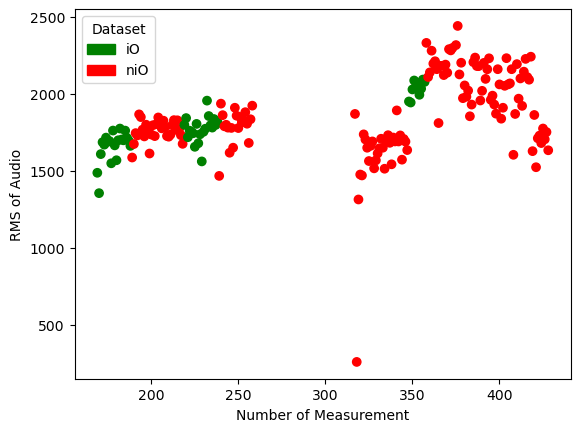

In [32]:
#get RMS of Audio based on M
RMS_list = [np.sqrt((df["M"]**2).mean()) for df in list_Audio]
RMS_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "RMS of Audio": RMS_list
})
#merge RMS with Dataset of excel
Audio_RMS_df = RMS_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_RMS_df.head())

colors = Audio_RMS_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_RMS_df['Number of Measurement'],Audio_RMS_df['RMS of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("RMS of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()


it`s not meaningful, because RMS and std have similar structure, so they have almost same picture.

### Mean of MFSS

   Number of Measurement      MFCC_0     MFCC_3     MFCC_6     MFCC_9 Dataset
0                    169  732.911804  18.698122   5.625089  10.439529      iO
1                    170  704.161438  22.522535  10.902296  11.581067      iO
2                    171  729.272705  19.868774   7.708509  11.347743      iO
3                    172  724.417419  21.074553   7.635079  11.092257      iO
4                    173  733.507324  19.921646   6.200096  11.090015      iO


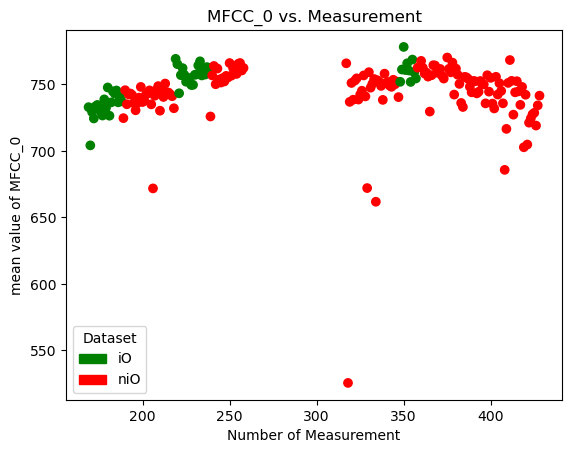

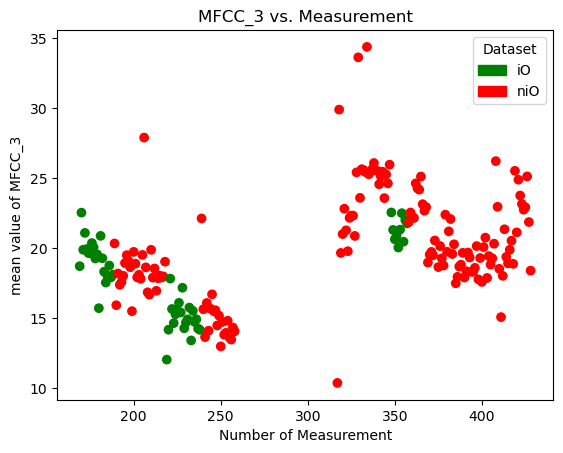

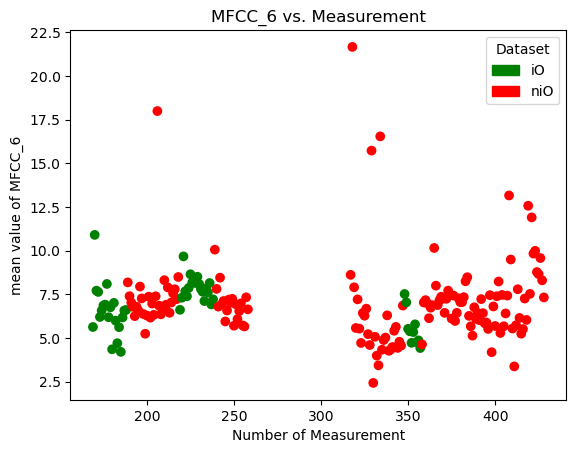

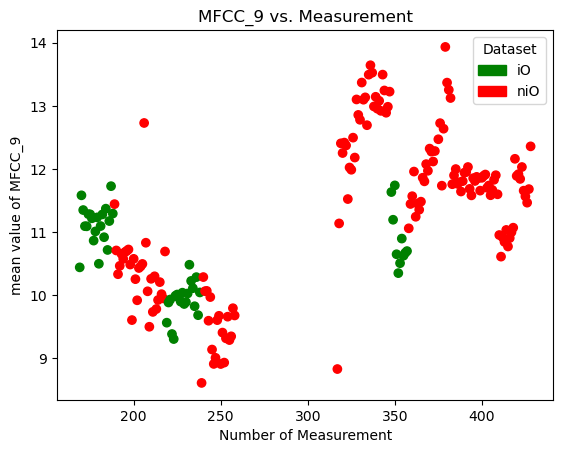

In [12]:
# Assume a sampling rate of 1 kHz
sr = 1000 
# compute mfccs
mfcc_0, mfcc_3, mfcc_6, mfcc_9 = [], [], [], []
for df in list_Audio:
    mfccs_audio = librosa.feature.mfcc(y=df["M"].values.astype(np.float32), sr=sr, n_mfcc=13)
    mfcc_0.append(np.mean(mfccs_audio[0]))
    mfcc_3.append(np.mean(mfccs_audio[3]))
    mfcc_6.append(np.mean(mfccs_audio[6]))
    mfcc_9.append(np.mean(mfccs_audio[9]))       


MFSS_list = [librosa.feature.mfcc(y=df["M"].values.astype(np.float32), sr=sr, n_mfcc=13) for df in list_Audio]
MFSS_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "MFCC_0": mfcc_0,
    "MFCC_3": mfcc_3,
    "MFCC_6": mfcc_6,
    "MFCC_9": mfcc_9
})
#merge MFSS with Dataset of excel
Audio_MFSS_df = MFSS_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_MFSS_df.head())

for MFCC in ['MFCC_0', 'MFCC_3', 'MFCC_6', 'MFCC_9']:
    colors = Audio_MFSS_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
    plt.scatter(Audio_MFSS_df['Number of Measurement'],Audio_MFSS_df[MFCC],c=colors)
    plt.xlabel("Number of Measurement")
    plt.ylabel(f"mean value of {MFCC}")
    plt.title(f"{MFCC} vs. Measurement")
    legend_handles = [
        mpatches.Patch(color='green', label='iO'),
        mpatches.Patch(color='red', label='niO')
    ]
    plt.legend(handles=legend_handles, title="Dataset")
    plt.show()




### Duration time of weld process

   Number of Measurement  Duration of Audio Dataset
0                    169           9.941333      iO
1                    170           7.936000      iO
2                    171           7.104000      iO
3                    172           7.392000      iO
4                    173           7.488000      iO


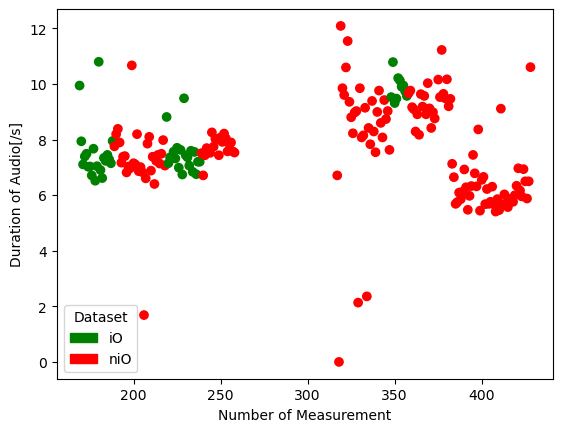

In [22]:
# compute duration time of weld process based on MFCC[0]
sr=48000
Duration = []
for df in list_Audio:
    mfccs_audio = librosa.feature.mfcc(y=df["M"].values.astype(np.float32), sr=sr, n_mfcc=13)
    duration = get_mfcc0_duration_over_threshold(mfccs_audio, 700, sr=sr)
    Duration.append(duration)

Duration_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "Duration of Audio": Duration
})
#merge uration with Dataset of excel
Audio_Duration_df_df = Duration_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_Duration_df_df.head())

colors = Audio_Duration_df_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_Duration_df_df['Number of Measurement'],Audio_Duration_df_df['Duration of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("Duration of Audio[/s]")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()

### FFT of all data


   Number of Measurement  RMS of Audio Dataset
0                    169   1485.917267      iO
1                    170   1353.614509      iO
2                    171   1607.308789      iO
3                    172   1684.633745      iO
4                    173   1668.711895      iO


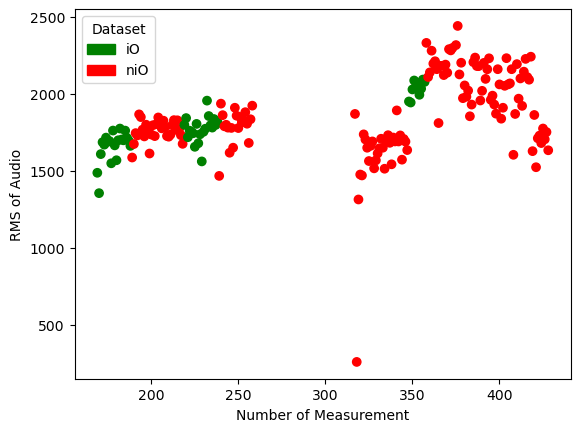

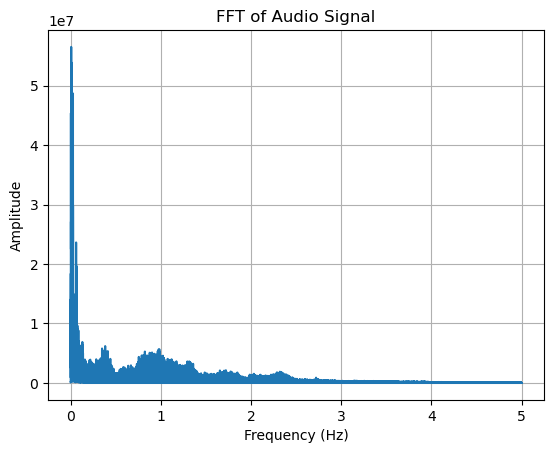

In [ ]:
"""
not finish  i`m tired
"""
peak_freq_list = []
for df in list_Audio:
    Y = np.fft.fft(df["M"])
    sr = 10
    frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
    Y_half = np.abs(Y[:len(Y)//2])
    freqs_half = frequencies[:len(frequencies)//2]

high_freq_energy = half_Y[half_freq > 5000].sum()

#get FFT of Audio based on M
FFT_list = [np.sqrt((df["M"]**2).mean()) for df in list_Audio]
FFT_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "RMS of Audio": RMS_list
})
#merge RMS with Dataset of excel
Audio_RMS_df = RMS_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_RMS_df.head())

colors = Audio_RMS_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_RMS_df['Number of Measurement'],Audio_RMS_df['RMS of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("RMS of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()

# FFT
# Perform the Fast Fourier Transform (FFT) on the audio signal in column "M"
Y = np.fft.fft(df["M"])
# Compute the frequency bins corresponding to the FFT result
sr = 10
frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
# Plot the magnitude spectrum (only the positive half of frequencies and amplitudes)
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y)[:len(Y)//2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Audio Signal")
plt.grid(True)
plt.show()

In [ ]:
# read 10 first audio file
for i in range (0,10):
    plt.figure(i)
    x = list_Audio[i]["Time"]
    y = list_Audio[i]["M"]
    plt.plot(x,y)
    plt.xlabel("Time (s)")
    plt.ylabel("M ")
    plt.title("Audio data from measurement" + str(i+1))


### Weldqas part

# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
print(df)
df.info()
x = df["Time"]
y = df["M"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("M ")


      Time [s]  Current [A]  Voltage [V]  Wire [m/min]
0     0.000000         11.7         0.83           0.0
1     0.000043         12.7         0.68           0.0
2     0.000085         13.2         0.68           0.0
3     0.000128         15.6         0.54           0.0
4     0.000170         15.2         0.00           0.0
...        ...          ...          ...           ...
4696  0.199583         18.1         0.00           0.0
4697  0.199626         16.1        -0.54           0.0
4698  0.199668         14.2        -0.54           0.0
4699  0.199711         12.7        -0.54           0.0
4700  0.199754         11.2        -0.54           0.0

[4701 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time [s]      4701 non-null   float64
 1   Current [A]   4701 non-null   float64
 2   Voltage [V]   4701 non-null   fl

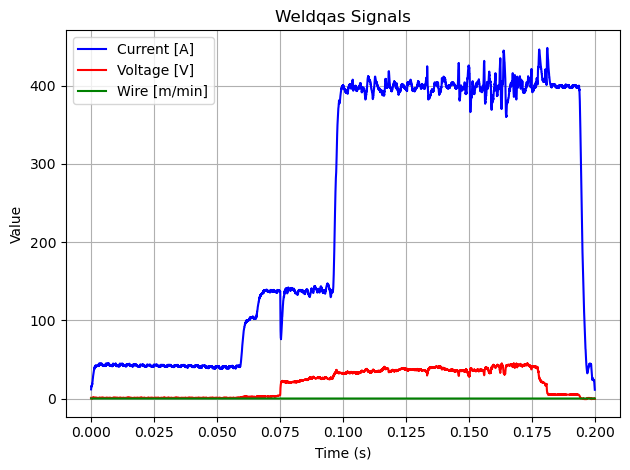

In [5]:
# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
print(df)
df.info()
"""
plt.figure(1)
x = df["Time [s]"]
y = df["Current [A]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.figure(2)
x = df["Time [s]"]
y = df["Voltage [V]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.figure(3)
x = df["Time [s]"]
y = df["Wire [m/min]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Wire (m/min)")
"""
plt.plot(df["Time [s]"], df["Current [A]"], label="Current [A]", color="blue")
plt.plot(df["Time [s]"], df["Voltage [V]"], label="Voltage [V]", color="red")
plt.plot(df["Time [s]"], df["Wire [m/min]"], label="Wire [m/min]", color="green")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Weldqas Signals")
plt.legend()  
plt.grid(True)
plt.tight_layout()
plt.show()


